In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import json
pd.options.display.max_columns = None
%matplotlib inline

# Layers imported from HOT export tool

## most of these layers are filled by Ramani Hurria team in Dar es Salaam

#### Let's first import out study area geometry and make a mask to  clip all the layers we have to it

In [4]:
study_area = gpd.read_file("./output/json/study_area.json")

In [30]:
mask = study_area.geometry.unary_union.buffer(0.001)



#### now let's import the layers one by one and explore it a little bit

In [8]:
water_ways = gpd.read_file('./hot_layers/water_ways.gpkg')

In [11]:
water_ways.shape

(498, 4)

In [10]:
water_ways.head()

,osm_id,waterway,name,geometry
0,23334747,river,Kibangu River,"LINESTRING (39.18510 -6.79637, 39.18514 -6.796..."
1,23334775,river,Tenge River,"LINESTRING (39.21753 -6.82790, 39.21751 -6.827..."
2,23334784,stream,None,"LINESTRING (39.26963 -6.82376, 39.26961 -6.823..."
3,23339023,stream,None,"LINESTRING (39.24389 -6.85664, 39.24409 -6.856..."
4,23339103,river,MZINGA RIVER,"LINESTRING (39.30177 -6.90623, 39.30202 -6.906..."


In [12]:
water_ways.waterway.unique()

array(['river', 'stream', 'canal'], dtype=object)

<AxesSubplot:>

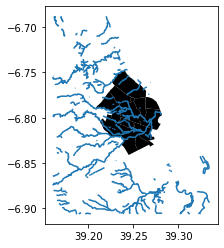

In [9]:
ax = study_area.plot(color = 'k')
water_ways.plot(ax=ax)

In [34]:
water_ways = gpd.clip(water_ways,mask)

<AxesSubplot:>

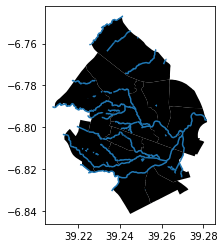

In [35]:
ax = study_area.plot(color = 'k')
water_ways.plot(ax=ax)

In [44]:
building_mat = gpd.read_file('./hot_layers/building_materials.gpkg')

In [46]:
building_mat = gpd.clip(building_mat, mask)

In [47]:
building_mat.head()

,osm_id,building:material,access:roof,roof:material,geometry
0,32682407,cement_block,None,None,"POLYGON ((39.21924 -6.80012, 39.21984 -6.80034..."
2,32773374,cement_block,None,None,"POLYGON ((39.21961 -6.80481, 39.22003 -6.80389..."
3,32773397,cement_block,None,None,"POLYGON ((39.22101 -6.80581, 39.22156 -6.80456..."
16,36073568,None,None,None,"POLYGON ((39.24374 -6.77527, 39.24390 -6.77493..."
17,36073570,cement_block,None,None,"POLYGON ((39.27848 -6.79111, 39.27848 -6.79102..."


<AxesSubplot:>

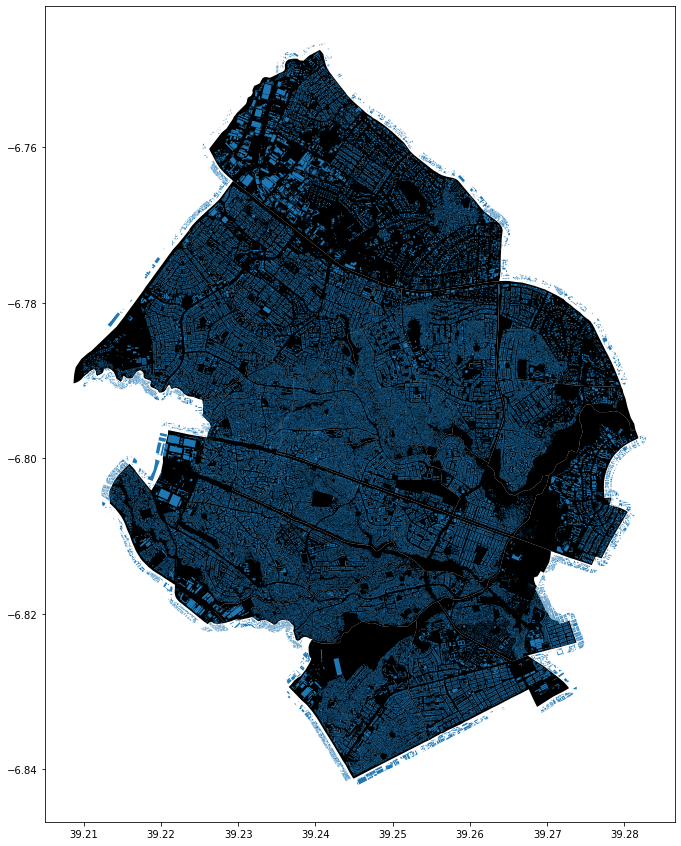

In [48]:
ax = study_area.plot(color = 'k', figsize = (15,15))
building_mat.plot(ax=ax)

In [85]:
# for the stations, I will use the file from the resilianse academy because it's more complete
bus_stations = gpd.read_file('./online_data/dar_es_salaam_bus_stops.shp')
bus_stations.head()

,id,id_1,highway,name,name_en,bus,public_tra,operator,geometry
0,node/282569490,node/282569490,bus_stop,Tazara,None,None,None,None,POINT (39.24519 -6.84433)
1,node/282569958,node/282569958,bus_stop,None,None,None,None,None,POINT (39.25628 -6.83862)
2,node/282570353,node/282570353,bus_stop,None,None,None,None,None,POINT (39.22912 -6.85239)
3,node/282570354,node/282570354,bus_stop,None,None,None,None,None,POINT (39.22895 -6.85225)
4,node/282570355,node/282570355,bus_stop,None,None,None,None,None,POINT (39.21437 -6.85941)


In [86]:
bus_stations = gpd.clip(bus_stations, mask)

In [87]:
bus_stations.dropna(axis=1, how='all', inplace=True)
bus_stations

,id,id_1,highway,name,name_en,bus,public_tra,operator,geometry
6,node/282762856,node/282762856,bus_stop,Mlimani City,Mlimani City,None,None,None,POINT (39.22077 -6.77439)
15,node/921695403,node/921695403,bus_stop,Msimbazi Police,None,None,platform,DART,POINT (39.27291 -6.82001)
16,node/921696363,node/921696363,bus_stop,Buses going south,None,None,None,None,POINT (39.27377 -6.82410)
17,node/922239750,node/922239750,bus_stop,Fire Bus Stop,None,None,None,None,POINT (39.27514 -6.81370)
18,node/922240806,node/922240806,bus_stop,Magomeni Kanisani,None,None,None,None,POINT (39.25936 -6.80486)
...,...,...,...,...,...,...,...,...,...
271,node/6976475109,node/6976475109,bus_stop,Kituoni cha daladala cha Komakoma,None,None,None,None,POINT (39.25832 -6.79227)
272,node/6976475110,node/6976475110,bus_stop,Kituoni cha daladala cha Kinondoni Vijana,None,None,None,None,POINT (39.26196 -6.79279)
273,node/6976475111,node/6976475111,bus_stop,Kituoni cha daladala cha Kinondoni,None,None,None,None,POINT (39.26431 -6.79004)
274,node/6976475112,node/6976475112,bus_stop,Kituoni cha daladala cha Shule,None,None,None,None,POINT (39.26945 -6.79026)


<AxesSubplot:>

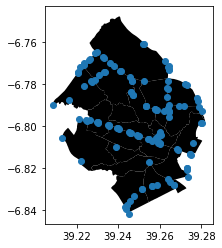

In [60]:
ax = study_area.plot(color='k')
bus_stations.plot(ax=ax)

In [61]:
health = gpd.read_file('./hot_layers/doc_clinic_hospital_pharmacy.gpkg')
health = gpd.clip(health, mask)
health.head()

,osm_id,staff_count:nurses,operator,health_facility:bed,toilets:handwashing,health_facility:type,amenity,opening_hours,access,staff_count:doctors,status,name,operator:type,health_facility:level,toilets:disposal,medical_system:western,geometry
3,282885265,None,None,None,None,None,pharmacy,None,None,None,None,Eden Pharmacy,None,None,None,None,POINT (39.26376 -6.76966)
5,922241342,None,None,None,None,None,pharmacy,None,None,None,None,Nakiete,None,None,None,None,POINT (39.23230 -6.76742)
6,924363061,None,None,None,None,None,pharmacy,None,None,None,None,Day and Night Pharmacy,None,None,None,None,POINT (39.27121 -6.77844)
7,1393496318,None,None,None,None,None,pharmacy,None,None,None,None,Phamacy,None,None,None,None,POINT (39.24396 -6.79120)
8,1394566410,None,None,None,None,None,pharmacy,None,None,None,None,None,None,None,None,None,POINT (39.24312 -6.79128)


In [63]:
health.amenity.unique()

array(['pharmacy', 'clinic', 'doctors', 'hospital'], dtype=object)

<AxesSubplot:>

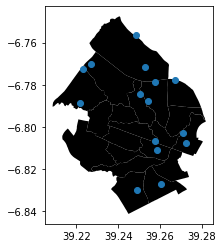

In [71]:
ax = study_area.plot(color='k')
health.loc[health.amenity == 'hospital'].plot(ax=ax)

In [79]:
health.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 613 entries, 3 to 1161
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   osm_id                  613 non-null    int64   
 1   staff_count:nurses      0 non-null      object  
 2   operator                11 non-null     object  
 3   health_facility:bed     0 non-null      object  
 4   toilets:handwashing     0 non-null      object  
 5   health_facility:type    0 non-null      object  
 6   amenity                 613 non-null    object  
 7   opening_hours           20 non-null     object  
 8   access                  0 non-null      object  
 9   staff_count:doctors     0 non-null      object  
 10  status                  0 non-null      object  
 11  name                    343 non-null    object  
 12  operator:type           1 non-null      object  
 13  health_facility:level   4 non-null      object  
 14  toilets:disposal 

In [83]:
health.dropna(axis=1, how='all', inplace=True)

In [88]:
health.head()

,osm_id,operator,amenity,opening_hours,name,operator:type,health_facility:level,geometry
3,282885265,None,pharmacy,None,Eden Pharmacy,None,None,POINT (39.26376 -6.76966)
5,922241342,None,pharmacy,None,Nakiete,None,None,POINT (39.23230 -6.76742)
6,924363061,None,pharmacy,None,Day and Night Pharmacy,None,None,POINT (39.27121 -6.77844)
7,1393496318,None,pharmacy,None,Phamacy,None,None,POINT (39.24396 -6.79120)
8,1394566410,None,pharmacy,None,None,None,None,POINT (39.24312 -6.79128)


In [89]:
landuse = gpd.read_file('./hot_layers/landuse.gpkg')

In [90]:
landuse.head()

,osm_id,landuse,amenity,name,leisure,geometry
0,3652759694,dump,None,None,None,POINT (39.20979 -6.77601)
1,3660165386,school,None,Minazini Primary School,None,POINT (39.25005 -6.78616)
2,3662923562,cemetery,None,None,None,POINT (39.23180 -6.81103)
3,3662923567,cemetery,None,None,None,POINT (39.23172 -6.81105)
4,5340839987,playground,None,TPDC Playground,None,POINT (39.24538 -6.76518)


In [91]:
landuse.landuse.unique()

array(['dump', 'school', 'cemetery', 'playground', 'recreation_ground',
       'greenfield', None], dtype=object)

In [92]:
landuse.dropna(axis=1, how='all', inplace=True)

In [93]:
landuse = gpd.clip(landuse, mask)

In [99]:
landuse.shape

(9, 6)

In [100]:
landuse

,osm_id,landuse,amenity,name,leisure,geometry
1,3660165386,school,None,Minazini Primary School,None,POINT (39.25005 -6.78616)
2,3662923562,cemetery,None,None,None,POINT (39.23180 -6.81103)
3,3662923567,cemetery,None,None,None,POINT (39.23172 -6.81105)
4,5340839987,playground,None,TPDC Playground,None,POINT (39.24538 -6.76518)
5,5340840013,playground,None,None,None,POINT (39.24593 -6.76531)
6,5340840521,recreation_ground,None,Also kassaby motors,None,POINT (39.24857 -6.75835)
8,6024953399,None,None,None,park,POINT (39.27604 -6.81230)
9,6406234116,None,grave_yard,Public Cemetery,None,POINT (39.24846 -6.77204)
10,6406234120,None,grave_yard,Ismaili Cemetery,None,POINT (39.24516 -6.77390)


<AxesSubplot:>

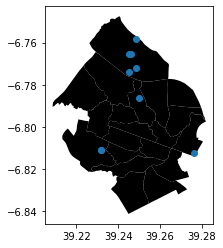

In [98]:
ax = study_area.plot(color = 'k')
landuse.plot(ax=ax)

In [101]:
# the landuse layer is totally useless

In [102]:
nature = gpd.read_file('./hot_layers/natural_landscape.gpkg')
nature.head()

,osm_id,landuse,natural,waterway,water,geometry
0,252721629,None,tree,None,None,POINT (39.27340 -6.88293)
1,252942372,None,tree,None,None,POINT (39.28168 -6.82413)
2,610013035,None,bay,None,None,POINT (39.26123 -6.75046)
3,1387153980,None,tree,None,None,POINT (39.24808 -6.79301)
4,1387153981,None,tree,None,None,POINT (39.24817 -6.79318)


In [103]:
nature.shape

(67317, 6)

In [104]:
nature.dropna(axis=1, how='all', inplace=True)

In [106]:
nature = gpd.clip(nature, mask)

In [108]:
nature.natural.unique()

array(['tree', 'spring'], dtype=object)

<AxesSubplot:>

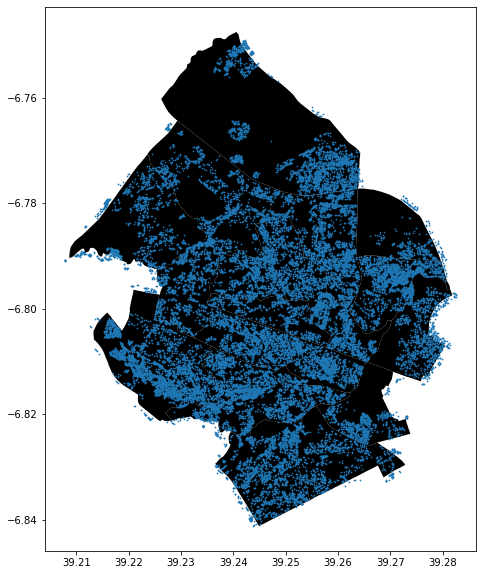

In [109]:
ax = study_area.plot(color='k', figsize=(10,10))
nature.plot(ax=ax, markersize = 0.5)

<AxesSubplot:>

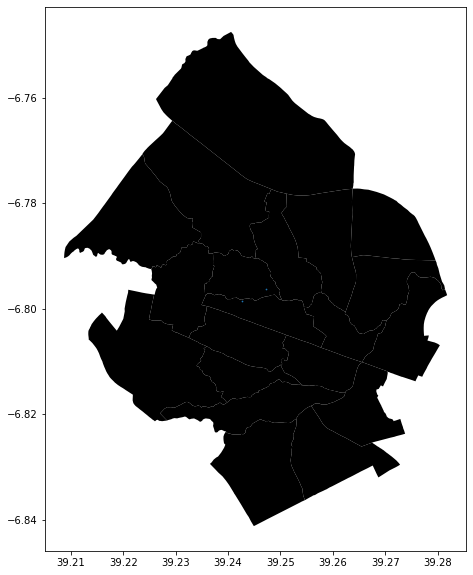

In [111]:
ax = study_area.plot(color='k', figsize=(10,10))
nature.loc[nature.natural == 'spring'].plot(ax=ax, markersize = 0.5)

In [110]:
# looks like this layer isn't very useful too

In [113]:
toilets = gpd.read_file('./hot_layers/public_toilets.gpkg')
toilets.head()

,osm_id,amenity,geometry
0,1393501012,toilets,POINT (39.23695 -6.79721)
1,1395881729,toilets,POINT (39.24853 -6.79671)
2,1399524008,toilets,POINT (39.23815 -6.79371)
3,1399524010,toilets,POINT (39.23734 -6.79389)
4,1399532982,toilets,POINT (39.24910 -6.79738)


In [114]:
toilets = gpd.clip(toilets, mask)

<AxesSubplot:>

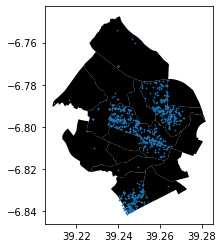

In [121]:
ax = study_area.plot(color='k')
toilets.plot(ax=ax, markersize = 0.5)

In [122]:
roads = gpd.read_file('./hot_layers/road_network.gpkg')
roads = gpd.clip(roads, mask)
print(roads.shape)
roads.head()

(8223, 11)


,osm_id,oneway,surface,width,smoothness,tunnel,name,bridge,layer,highway,geometry
0,5086074,None,paved,None,None,None,United Nations Road,None,None,tertiary,"LINESTRING (39.27327 -6.81283, 39.27329 -6.812..."
1,23319731,no,asphalt,15,good,None,Kaunda Drive,None,None,tertiary,"LINESTRING (39.27772 -6.78655, 39.27781 -6.786..."
4,23319740,None,asphalt,10,good,None,Old Bagamoyo Road,None,None,tertiary,"LINESTRING (39.27099 -6.77874, 39.27098 -6.778..."
6,23319781,None,asphalt,None,None,None,Migombani Street,None,None,secondary,"LINESTRING (39.26412 -6.77162, 39.26268 -6.771..."
7,23320290,None,asphalt,None,None,None,Shekilango,None,None,secondary,"LINESTRING (39.23765 -6.77090, 39.23705 -6.771..."


In [123]:
roads.dropna(axis=1, how = 'all', inplace=True)

<AxesSubplot:>

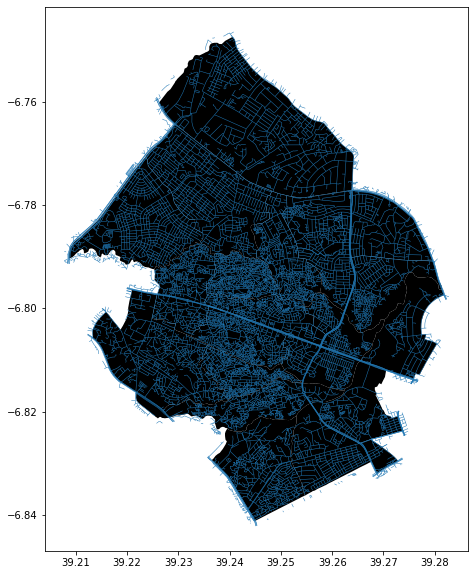

In [126]:
ax = study_area.plot(color='k', figsize = (10,10))
roads.plot(ax=ax, linewidth = 0.5)

In [129]:
roads.geom_type.value_counts()

LineString         8177
MultiLineString      46
dtype: int64

In [132]:
schools = gpd.read_file('./hot_layers/schools.gpkg')
schools = gpd.clip(schools, mask)
schools.dropna(axis=1, how = 'all', inplace=True)
print(schools.geom_type.value_counts())
print(schools.shape)
schools.head()

Point    215
dtype: int64
(215, 5)


,osm_id,capacity,amenity,name,geometry
1,282890736,None,school,Feza Primary School,POINT (39.25616 -6.76402)
2,330146126,None,school,Feza Nursery School,POINT (39.22695 -6.76781)
4,920966534,None,school,Hekima Waldorf Primary School,POINT (39.24295 -6.76480)
5,1399692842,None,school,None,POINT (39.24835 -6.79849)
6,1401911303,None,school,Madrasa,POINT (39.24449 -6.79354)


<AxesSubplot:>

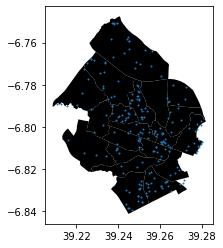

In [135]:
ax = study_area.plot(color='k')
schools.plot(ax=ax, markersize = 1)

In [138]:
water_points = gpd.read_file('./hot_layers/water_points.gpkg')
water_points = gpd.clip(water_points, mask)
water_points.dropna(axis=1, how = 'all', inplace=True)
print(water_points.geom_type.value_counts())
print(water_points.shape)
water_points.head()

Point    36
dtype: int64
(36, 3)


,osm_id,amenity,geometry
0,3752511488,water_point,POINT (39.23550 -6.80269)
1,3752512606,water_point,POINT (39.23480 -6.80268)
2,3752512609,water_point,POINT (39.23481 -6.80266)
3,3752512612,water_point,POINT (39.23481 -6.80268)
4,3752521797,water_point,POINT (39.23452 -6.80259)


<AxesSubplot:>

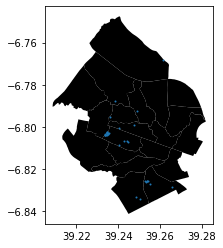

In [139]:
ax = study_area.plot(color='k')
water_points.plot(ax=ax, markersize = 1)

In [147]:
# this layer is quite useless, so i will get similar data from Dar es Salaam masterplan report

In [141]:
water_tower_pump = gpd.read_file('./hot_layers/water_tower_pump.gpkg')
water_tower_pump = gpd.clip(water_tower_pump, mask)
water_tower_pump.dropna(axis=1, how = 'all', inplace=True)
print(water_tower_pump.geom_type.value_counts())
print(water_tower_pump.shape)
water_tower_pump.head()

Point    92
dtype: int64
(92, 3)


,osm_id,man_made,geometry
0,1394646167,water_tower,POINT (39.24545 -6.79495)
1,1395839913,water_tower,POINT (39.24338 -6.79142)
2,1399595573,water_tower,POINT (39.24312 -6.79324)
3,1401911321,water_tower,POINT (39.24490 -6.79237)
4,1401911348,water_tower,POINT (39.24404 -6.79276)


In [143]:
water_tower_pump.man_made.unique()

array(['water_tower'], dtype=object)

In [144]:
water_tower = water_tower_pump

<AxesSubplot:>

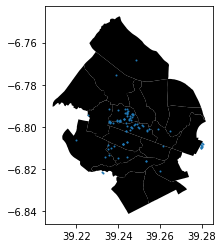

In [145]:
ax = study_area.plot(color='k')
water_tower.plot(ax=ax, markersize = 1)

### Exporting all the layers

In [148]:
water_ways.to_file("./output/json/water_ways.json", driver='GeoJSON')
building_mat.to_file("./output/json/building_mat.json", driver='GeoJSON')
bus_stations.to_file("./output/json/bus_stations.json", driver='GeoJSON')
health.to_file("./output/json/health.json", driver='GeoJSON')
nature.to_file("./output/json/trees.json", driver='GeoJSON')
toilets.to_file("./output/json/toilets.json", driver='GeoJSON')
roads.to_file("./output/json/roads.json", driver='GeoJSON')
schools.to_file("./output/json/schools.json", driver='GeoJSON')
water_tower.to_file("./output/json/water_tower.json", driver='GeoJSON')